**By creating a 'minisom' using the bank dataset, I identified the most outliers and trained them with an ann model.**

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv("Churn_Modelling.csv")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
X = data.drop(["RowNumber","Surname"],axis = 1)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X["Gender"] =le.fit_transform(X["Gender"])

In [39]:
X = pd.get_dummies(X,["Geography"])

In [40]:
X.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [41]:
y = X["Exited"].values

In [42]:
X = X.drop(["Exited"],axis = 1).values

In [43]:
X_copy = X

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [45]:
from minisom import MiniSom
som = MiniSom(x=20, y=20, input_len= 13, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 500)

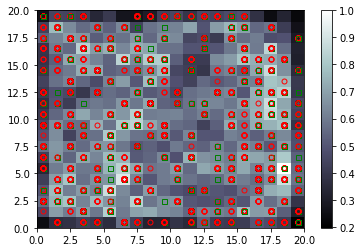

In [46]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 5,
         markeredgewidth = 1)
show()

In [19]:
import numpy as np

In [47]:
mappings = som.win_map(X)
exitters = np.concatenate((mappings[(6,4)], mappings[(18,5)]), axis = 0)
exitters = sc.inverse_transform(exitters)

In [48]:
print('Exitter Customer IDs')
for i in exitters[:, 0]:
  print(int(i))

Exitter Customer IDs
15641582
15585388
15713853
15624528
15583456
15591995
15567446
15571221
15660602
15677135
15700476
15575417
15685150
15640260
15600991
15693018
15617518
15634950
15617603
15573893
15566843
15733429
15621629
15621210
15630617
15648702
15669957
15573280
15597033
15694453
15631070
15588622
15607748
15643361
15566633
15663164
15606641
15585734
15618401
15689886
15621064
15630580
15635034
15593280
15569670
15620000
15576641
15607230
15595158
15663883
15725221
15706217
15706036
15746065
15615050
15656822
15613180
15699515
15655252
15666559
15662908
15612358
15618363
15583394
15704081
15609070
15654625
15581871
15608804
15700511
15575146
15650591
15718572
15629002
15600912
15650437
15579074
15586752
15656592
15618203
15574554
15598940
15659305
15759244
15615444
15594786
15609521
15696175
15809616
15787470
15775153
15790497
15779182
15787459
15812982
15814998
15713370
15734970
15813894
15811985
15784445
15767598
15760924
15799924
15813718
15716082
15813363
15779492
1581276

In [49]:
customers = X_copy

In [52]:
len(data)

10000

In [55]:
is_exitter = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,1] in exitters:
        is_exitter[i] = 1

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [57]:
import tensorflow as tf

In [61]:
ann_model = tf.keras.models.Sequential()

In [62]:
ann_model.add(tf.keras.layers.Dense(units=8, activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [65]:
ann_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [66]:
ann_model.fit(customers, is_exitter, batch_size = 16, epochs = 25)

Epoch 1/25
625/625 [==============================] - 2s 2ms/step - loss: 0.2505 - accuracy: 0.9174
Epoch 2/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0543 - accuracy: 0.9888
Epoch 3/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0393 - accuracy: 0.9888
Epoch 4/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0336 - accuracy: 0.9888
Epoch 5/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9895
Epoch 6/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9907
Epoch 7/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0218 - accuracy: 0.9924
Epoch 8/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9927
Epoch 9/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9936
Epoch 10/25
625/625 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9939